<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/RndomForest_learning_toool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [36]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [37]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.828638,0.128541,1.305513,1.674940,0.813939,0
1,-0.002874,-0.272639,-0.039031,-0.528653,0.121011,0
2,1.705654,2.678433,1.110733,-2.848799,-2.370100,1
3,1.759195,-0.208221,-0.402042,0.066203,1.657461,0
4,0.745366,-0.500262,1.511469,0.899067,0.070234,1


In [38]:
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [52]:
import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [40]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [43]:
 sample_features(df,0.5)

,col4,col5
0,1.674940,0.813939
1,-0.528653,0.121011
2,-2.848799,-2.370100
3,0.066203,1.657461
4,0.899067,0.070234
...,...,...
95,0.857996,-0.238178
96,-3.600410,-2.398913
97,0.831241,2.128432
98,-4.041424,-3.483772


In [44]:
df1 = sample_rows(df,0.1)

In [ ]:
df2 = sample_rows(df,0.1)

In [ ]:
df3 = sample_rows(df,0.1)

In [53]:
df1 = sample_features(df,0.8)

/tmp/ipython-input-1988266222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [54]:
df2 = sample_features(df,0.8)

/tmp/ipython-input-1988266222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [55]:
df3 = sample_features(df,0.8)

/tmp/ipython-input-1988266222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [56]:
df3.shape

(100, 5)

In [57]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [59]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])


DecisionTreeClassifier()

In [60]:
from sklearn.tree import plot_tree

[Text(0.5263157894736842, 0.9545454545454546, 'x[3] <= 0.819\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3157894736842105, 0.8636363636363636, 'x[3] <= -1.028\ngini = 0.414\nsamples = 65\nvalue = [19, 46]'),
 Text(0.42105263157894735, 0.9090909090909092, 'True  '),
 Text(0.21052631578947367, 0.7727272727272727, 'x[1] <= 0.285\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.15789473684210525, 0.6818181818181818, 'x[2] <= -0.548\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.10526315789473684, 0.5909090909090909, 'x[2] <= -0.674\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05263157894736842, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.5909090909090909, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2631578947368421, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42105263157894735, 0.7727272727272727, 'x[0] <= -

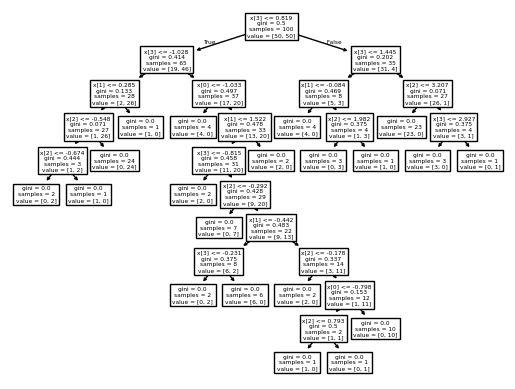

In [61]:
plot_tree(clf1)

[Text(0.5, 0.9545454545454546, 'x[2] <= 0.819\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.8636363636363636, 'x[2] <= -1.028\ngini = 0.414\nsamples = 65\nvalue = [19, 46]'),
 Text(0.375, 0.9090909090909092, 'True  '),
 Text(0.15, 0.7727272727272727, 'x[1] <= -0.256\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.1, 0.6818181818181818, 'x[1] <= -0.674\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.05, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15, 0.5909090909090909, 'x[2] <= -1.407\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.5, 'x[0] <= 1.148\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.6818181818181818, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.35, 0.7727272727272727, 'x[0] <= -1

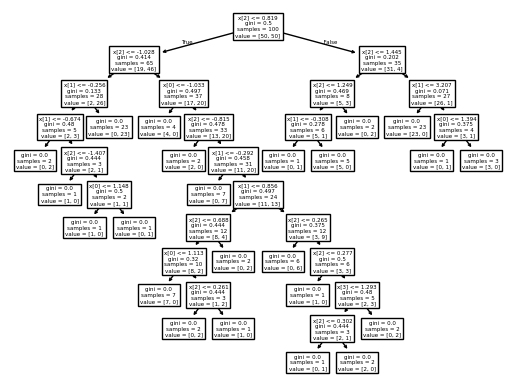

In [62]:
plot_tree(clf2)

[Text(0.5263157894736842, 0.95, 'x[1] <= 0.819\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3157894736842105, 0.85, 'x[1] <= -1.028\ngini = 0.414\nsamples = 65\nvalue = [19, 46]'),
 Text(0.42105263157894735, 0.8999999999999999, 'True  '),
 Text(0.21052631578947367, 0.75, 'x[2] <= 0.285\ngini = 0.133\nsamples = 28\nvalue = [2, 26]'),
 Text(0.15789473684210525, 0.65, 'x[0] <= -0.548\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.10526315789473684, 0.55, 'x[0] <= -0.674\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05263157894736842, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.55, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.2631578947368421, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42105263157894735, 0.75, 'x[3] <= -1.033\ngini = 0.497\nsamples = 37\nvalue = [17, 20]'),
 Text(0.3684210526315789, 0.65, 'gini = 0.0\nsamples = 

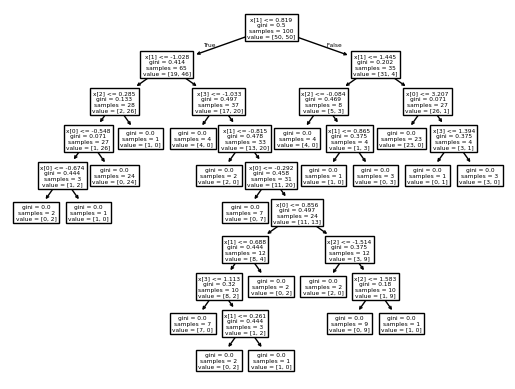

In [63]:
plot_tree(clf3)

In [66]:
clf1.predict(np.array([0.128541,	1.674940,	0.813939,	1.305513]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [67]:
clf2.predict(np.array([0.128541,	1.674940,	0.813939,	1.305513]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [68]:
clf3.predict(np.array([0.128541,	1.674940,	0.813939,	1.305513]).reshape(1,4))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [64]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'col2', 'col4', 'target'], dtype='object')
Index(['col3', 'col2', 'col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col4', 'col5', 'col3', 'target'], dtype='object')


In [65]:
df3

,col2,col4,col5,col3,target
0,0.128541,1.674940,0.813939,1.305513,0
1,-0.272639,-0.528653,0.121011,-0.039031,0
2,2.678433,-2.848799,-2.370100,1.110733,1
3,-0.208221,0.066203,1.657461,-0.402042,0
4,-0.500262,0.899067,0.070234,1.511469,1
...,...,...,...,...,...
95,1.287282,0.857996,-0.238178,2.616255,0
96,3.323451,-3.600410,-2.398913,0.005688,1
97,2.574404,0.831241,2.128432,3.718038,0
98,1.753151,-4.041424,-3.483772,0.389881,1
